## 1. Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib

## 2. Importando dataframe

In [2]:
df = pd.read_csv('desafio_indicium_imdb.csv')

In [3]:
df.head(5)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


Excluindo a coluna 'Unnamed', que contém IDs únicos para cada filme. A exclusão desta coluna não causará nenhum impacto negativo.

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


Dicionário explicativo das colunas. Este dicionário será usado ao longo do projeto para as legendas dos gráficos.

In [5]:
dic_grafico= {'Series_Title': 'Título do Filme',
      'Released_Year': 'Ano de Lançamento',
      'Certificate': 'Classificação etária',
      'Runtime': 'Tempo de Duração',
      'Genre': 'Gênero',
      'IMDB_Rating': 'Nota do IMDB',
      'Overview': 'Overview do filme',
      'Meta_score':'Média das críticas',
      'Director':'Diretor',
      'Star1':'Ator/atriz #1',
      'Star2':'Ator/atriz #2',
      'Star3':'Ator/atriz #3',
      'Star4':'Ator/atriz #4',
      'No_of_Votes': 'Número de Críticas',
      'Gross':'Faturamento'
      }

In [6]:
print("'- - - - -> Informações Dataframe <- - - - -")
df.info()
print("- - - - - - - - - - - - - - - - - - - - - - -")
print("Formato DataFrame: ", df.shape)

'- - - - -> Informações Dataframe <- - - - -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB
- - - - - - - - - - - - - - - - - - -

In [7]:
print("- - - -> Valores Únicos <- - - -")
print(df.nunique())
print("- - - - - - - - - - - - - - - -")

- - - -> Valores Únicos <- - - -
Series_Title     998
Released_Year    100
Certificate       16
Runtime          140
Genre            202
IMDB_Rating       16
Overview         999
Meta_score        63
Director         548
Star1            659
Star2            840
Star3            890
Star4            938
No_of_Votes      998
Gross            822
dtype: int64
- - - - - - - - - - - - - - - -


As colunas 'Gross', 'Runtime' e 'Released_Year' estão no formato de objeto. É necessário convertê-las para o formato numérico para permitir análises e desenvolvimento adequado do desafio.

In [8]:
def valores_unicos(df, colunas):
    for coluna in colunas:
        print(f'\n Valores únicos coluna {coluna}:')
        print(df[coluna].unique())

In [9]:
#Verificando os valores únicos de cada coluna
val_unicos=['Released_Year', 'Runtime', 'Gross']
valores_unicos(df,val_unicos)


 Valores únicos coluna Released_Year:
['1972' '2008' '1974' '1957' '2003' '1994' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943' 'PG']

 Valores únicos coluna Runtime:
['175 min' '152 min' '202 min' '96 min' '201 min' '154 min' '195 min'
 '148 min' '139 min' '178 min' '142 min' '161 min' '179 min' '136 min'
 '146 min' '124 min' '133 min' '160 min' '132 min' '153 min' '169 min'
 '130 m

A coluna 'Release_Year' contém uma string, portanto, é necessário tratar essa string antes de convertê-la para um valor numérico.

In [10]:
# Coluna 'Released_Year' tem um a presença de 'PG'
release_pg = df[df['Released_Year']=='PG']
release_pg

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


Para o tratamento, foi decidido pesquisar o ano de lançamento do filme Apollo 13 na internet, descobrindo que o ano de lançamento foi 1995. Decidiu-se então substituir o valor de 'PG' por 1995.

Referência: https://www.imdb.com/title/tt6590506/?ref_=fn_al_tt_3

In [11]:
df['Released_Year'] = df['Released_Year'].replace('PG', '1995')

Alterando as colunas 'Released_Year', 'Runtime' e 'Gross' de tipo object para int e float

In [12]:
df['Released_Year'] = df['Released_Year'].astype(int)
# Na coluna Runtime precisou substituir o min antes da conversão
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
# Na coluna Gross precisou  substituir a vírgula antes da conversão
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

In [13]:
# Valores após a modifficação das colunas
valores_unicos(df,val_unicos)


 Valores únicos coluna Released_Year:
[1972 2008 1974 1957 2003 1994 1993 2010 1999 2001 1966 2002 1990 1980
 1975 2020 2019 2014 1998 1997 1995 1991 1977 1962 1954 1946 2011 2006
 2000 1988 1985 1968 1960 1942 1936 1931 2018 2017 2016 2012 2009 2007
 1984 1981 1979 1971 1963 1964 1950 1940 2013 2005 2004 1992 1987 1986
 1983 1976 1973 1965 1959 1958 1952 1948 1944 1941 1927 1921 2015 1996
 1989 1978 1961 1955 1953 1925 1924 1982 1967 1951 1949 1939 1937 1934
 1928 1926 1920 1970 1969 1956 1947 1945 1930 1938 1935 1933 1932 1922
 1943]

 Valores únicos coluna Runtime:
[175 152 202  96 201 154 195 148 139 178 142 161 179 136 146 124 133 160
 132 153 169 130 125 189 116 127 118 121 207 122 106 112 151 150 155 119
 110  88 137  89 165 109 102  87 126 147 117 181 149 105 164 170  98 101
 113 134 229 115 143  95 104 123 131 108  81  99 114 129 228 128 103 107
  68 138 156 167 163 186 321 135 140 180 158 210  86 162 177 204  91 172
  45 145 100 196  93 120  92 144  80 183 111 141 224 171 18

In [14]:
print("- - - - -> Valores Nulos <- - - - -")
print(df.isnull().sum())
print("- - - - - - - - - - - - - - - - - -")
print("Número de linhas duplicadas:", df.duplicated().sum())

- - - - -> Valores Nulos <- - - - -
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64
- - - - - - - - - - - - - - - - - -
Número de linhas duplicadas: 0


Após verificar os valores nulos, observou-se que as colunas 'Certificate', 'Meta_score' e 'Gross' possuem valores ausentes. Para a coluna 'Certificate', foi utilizado o valor da moda para substituição, uma vez que é uma coluna de tipo object. Para 'Meta_score' e 'Gross', optou-se por utilizar a mediana, pois esses valores são os que melhor representam os dados disponíveis.

In [15]:
moda_certificate= df['Certificate'].mode()[0]
mediana_meta_score= df['Meta_score'].median()
mediana_gross = df['Gross'].median()
df['Certificate'].fillna(moda_certificate, inplace=True)
df['Meta_score'].fillna(mediana_meta_score, inplace=True)
df['Gross'].fillna(mediana_gross, inplace=True)

C:\Users\adrie\AppData\Local\Temp\ipykernel_13100\1538241004.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna(moda_certificate, inplace=True)
C:\Users\adrie\AppData\Local\Temp\ipykernel_13100\1538241004.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


## 3. Análise exploratória

#### 3.1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!

In [16]:
# Para padronizar as cores dos gráficos
blue = "#0071bc"
orange = '#fe7218'
darkblue= '#1d3557'

##### 3.1.1. Análises distributivas

In [17]:
#Estatísticas descritivas
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02
mean,1991.218218,122.871872,7.947948,78.131131,2.716214e+05,6.053338e+07
std,23.297166,28.101227,0.272290,11.373766,3.209126e+05,1.014694e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.000000,5.547150e+04,5.011838e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.000000,137.000000,8.100000,85.500000,3.731675e+05,6.157656e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


In [18]:
#Criação de uma função para plotar gráficos discritivos
def analise_distributiva(df, colunas, dic=dic_grafico):
    for coluna in colunas:
        plt.figure(figsize=(10, 3))
        sns.histplot(df[coluna], bins=30, kde=False, color=blue, linewidth=0.5)
        plt.xlabel(dic[coluna])
        plt.ylabel('Quantidade de Filmes')
        plt.title(f'Distribuição de Filmes por {dic[coluna]}',weight= 'bold', size=12)
        plt.grid(axis='y', linestyle= ':')
        plt.show()

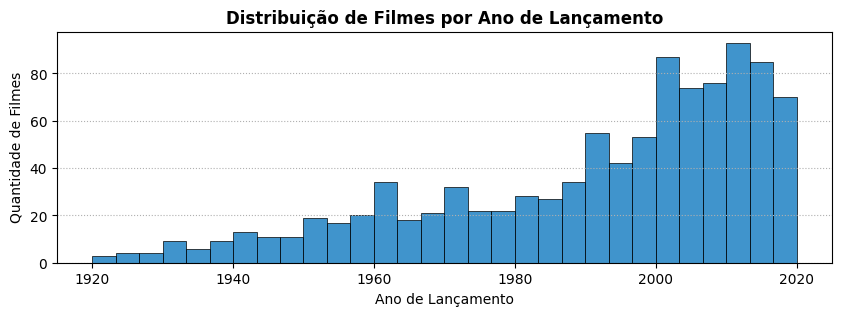

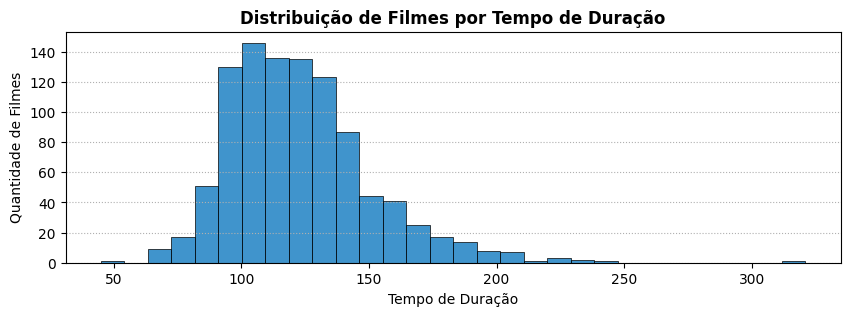

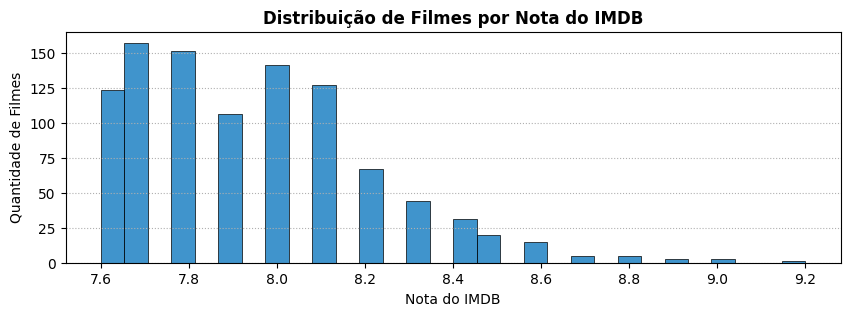

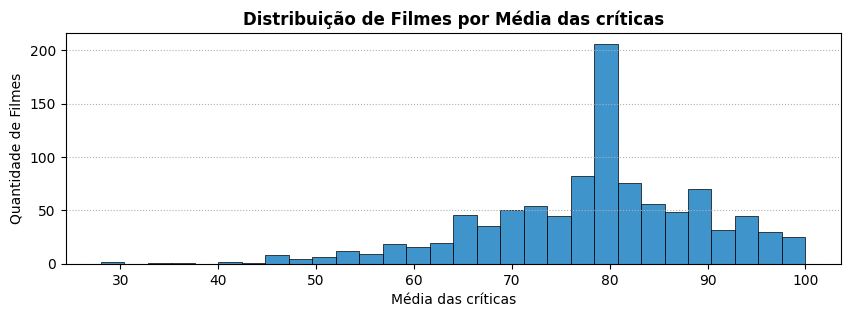

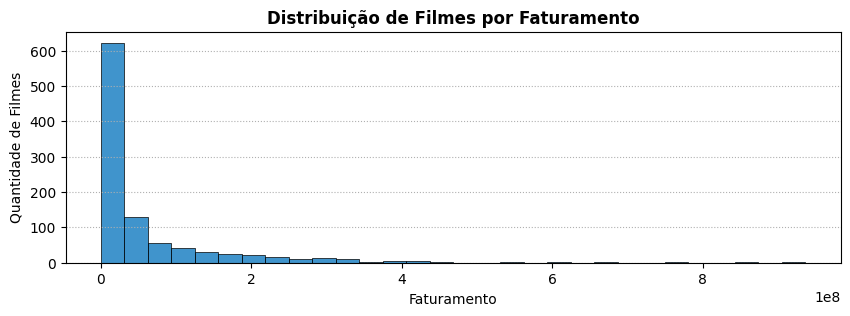

In [19]:
coluna_analise_distributiva = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'Gross']
analise_distributiva(df, coluna_analise_distributiva)

In [20]:
df['Gross'].value_counts()

Gross
23457439.5     169
4360000.0        5
5321508.0        2
25000000.0       2
5450000.0        2
              ... 
10950.0          1
4018695.0        1
141319928.0      1
106954678.0      1
30500000.0       1
Name: count, Length: 823, dtype: int64

Análise Descritiva

- A quantidade de filmes lançados aumentou com os anos. E o ano de 2014 foi o que teve maior quantidade de filmes lançados;
- O tempo de duração de filmes varia de 45 a 321, entretanto a maioria dos filmes tem duração de 130 min;
- Em relação as notas, o valor de IMDB variam mais entre 7.7 e 8. Já os valores de Meta_score são mais altas, variam de 79 a 90;
- A distrituição do faturamento não é muito uniforme quando comparada as outras variáveis. A maioria dos filmes possuem um faturamento mais baixo entre 0 a 200,000,000.


##### 3.1.2. Análise de Correlação

In [21]:
def correlation_map (df, colunas): 
    corr_matrix= df[colunas].corr()
    sns.heatmap(corr_matrix, annot= True,
            cmap="coolwarm",
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".0%", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

    plt.title("Mapa de Correlação", weight= 'bold', size=15)

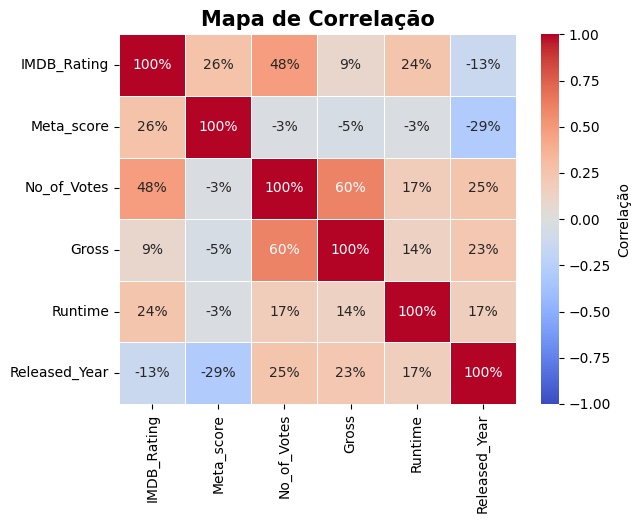

In [22]:
# Correlação entre as variáveis númericas
num_colunas = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime', 'Released_Year']
correlation_map(df, num_colunas)

A maioria das correlações é do tipo moderada e alguns insights podem ser levantados a partir disso:

1. **IMDB_Rating** e **Meta_score** correlação de 26% 

    Há uma correlação positiva moderada de 26% entre IMDB_Rating e Meta_score. Isso sugere que filmes com pontuações mais altas no IMDB tendem a ter também pontuações mais altas no Meta_score, pois o Meta_score representa a média ponderada das avaliações.

2. **IMDB_Rating** e **No_of_Votes** correlação de 48% 

    Há uma correlação positiva de 48% entre IMDB_Rating e No_of_Votes. Filmes com avaliações mais altas tendem a receber um maior número de votos, o que pode indicar uma maior visibilidade ou interesse por parte do público.

3. **No_of_Votes** e **Gross** correlação de 60% 

    Existe uma correlação positiva significativa de 60% entre No_of_Votes (número de votos) e Gross (arrecadação). Filmes que acumulam mais votos tendem a ter uma arrecadação mais elevada, o que pode indicar maior popularidade ou sucesso comercial ou até mesmo uma maior qualidade nos filmes.

4. **Runtime** e **Released_Year** correlação de 17% 

    A correlação entre Runtime (duração do filme) e Released_Year (ano de lançamento) é de 17%. Isso sugere que ao longo dos anos, a duração média dos filmes pode ter uma leve variação, refletindo talvez mudanças nas preferências do público ou tendências na indústria cinematográfica.

5. **Meta_score** e **Released_Year** correlação de -29% 

    A correlação entre Meta_score e Released_Year é de -29%. Isso sugere que ao longo dos anos, as pontuações críticas podem variar, refletindo mudanças nas normas críticas ou nas preferências do público ao longo do tempo.

##### 3.1.3. Análises Tempo

In [23]:
def analise_tempo(df, colunas, dic=dic_grafico, alvo='Released_Year'):
    for coluna in colunas:
             
        plt.figure(figsize=(12, 3))
        media_por_ano = df.groupby(alvo)[coluna].mean().reset_index()
        picos = media_por_ano.nlargest(3, coluna)
        
        sns.lineplot(x=alvo, y= coluna, data=df, color=blue, errorbar=None, markers='o', zorder=1)
                  
        # Marcar os picos no gráfico
        plt.scatter(x=picos[alvo], y=picos[coluna], color=darkblue, marker='o', s=50,  zorder=2)
        
        # Adicionar anotações com os valores dos picos
        for i, (index, row) in enumerate(picos.iterrows()):
        
            plt.annotate(f'{row[coluna]:.0f}\n ({row[alvo]:.0f})' , (row[alvo], row[coluna]),
                          textcoords="offset points", xytext=(-4,-18), ha='right')
        
        
        plt.title(f'Média do {dic[coluna]} vs. {dic[alvo]}', weight= 'bold', size=15)
        plt.xlabel(dic[alvo])
        plt.ylabel(dic[coluna])
        plt.grid(axis='y', linestyle= ':')
        plt.tight_layout() 
        plt.show()

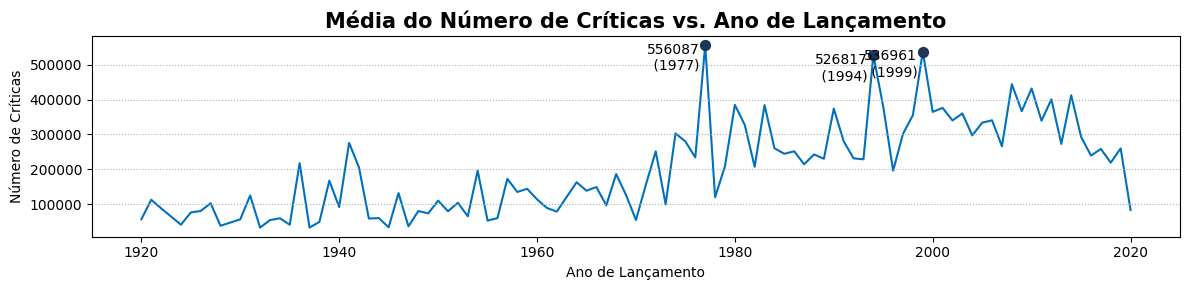

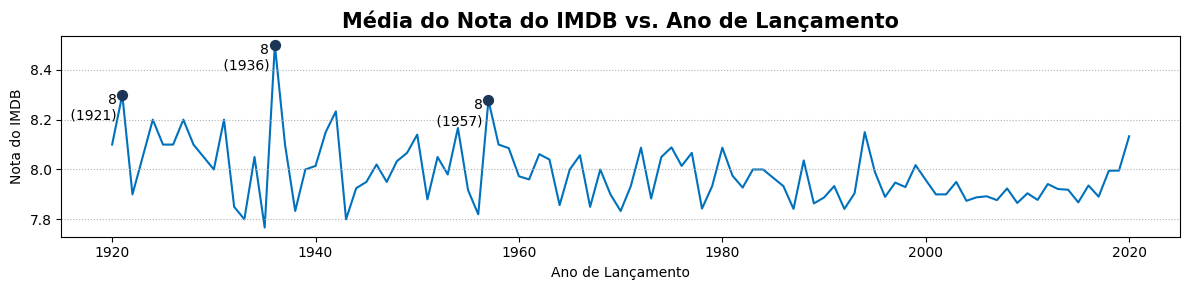

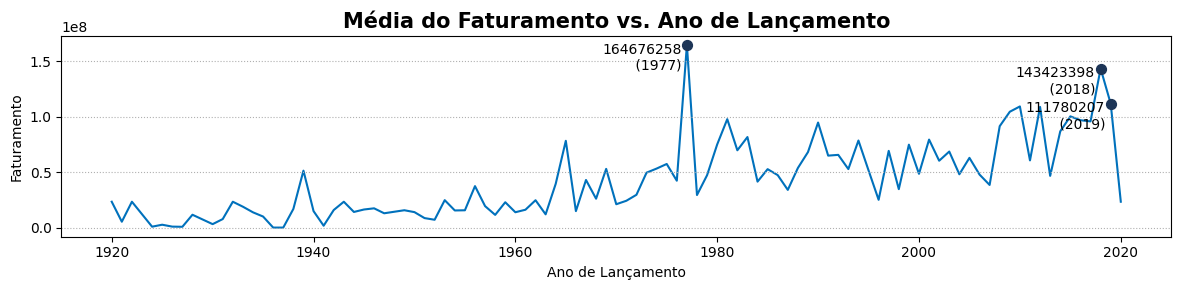

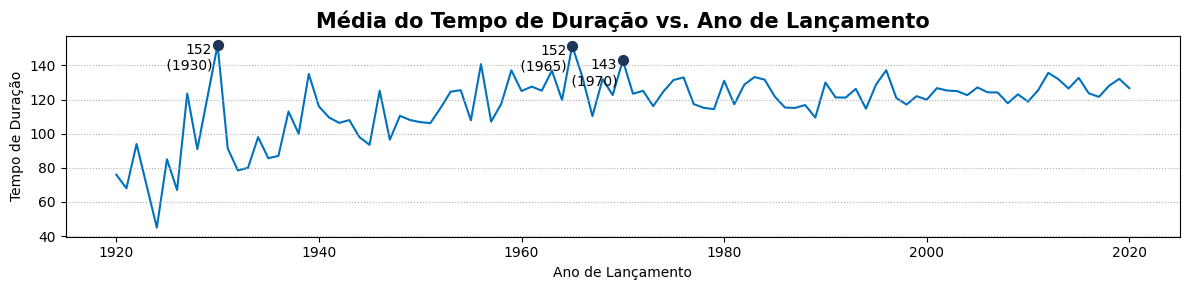

In [24]:
colunas_tempo = ['No_of_Votes','IMDB_Rating', 'Gross', 'Runtime']
analise_tempo(df, colunas_tempo)

**Insight relacionados ao ano de lançamento**

-  Observou-se um aumento relacionado ao número médio de críticas dos filmes ao decorrer dos anos. Outro ponto de destaque é que o pico de maior intensidade de números de críticas é em 1977 que foi o ano de lançamento de Star Wars. O filme de Star Wars foi um grande sucesso na época, tanto em bilheteria quanto em relação as críticas, também foi ganhador de 6 Oscar;

- A média das notas de IMDB não tiveram muitas variações ao decorrer dos anos. É uma variável que demonstra bem uniforme quando comparada com os anos de lançamento;

- O faturamento também teve um leve aumento conforme os anos e seus maiores valores foram em 1977 com o lançamento de Star Wars e depois disso só em 2018 e 2019 com os filmes da franquia da Marvel;

- Observou um aumento no tempo de duração dos filmes, significando um maior interesse do público para filmes de média e longa metragem.


In [25]:
df[df['Released_Year']==1977]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
28,Star Wars,1977,UA,121,"Action, Adventure, Fantasy",8.6,Luke Skywalker joins forces with a Jedi Knight...,90.0,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness,1231473,322740140.0
413,Annie Hall,1977,A,93,"Comedy, Romance",8.0,Neurotic New York comedian Alvy Singer falls i...,92.0,Woody Allen,Woody Allen,Diane Keaton,Tony Roberts,Carol Kane,251823,39200000.0
987,Close Encounters of the Third Kind,1977,U,138,"Drama, Sci-Fi",7.6,"Roy Neary, an electric lineman, watches how hi...",90.0,Steven Spielberg,Richard Dreyfuss,François Truffaut,Teri Garr,Melinda Dillon,184966,132088635.0


##### 3.1.4. Análises Gênero

In [26]:
#Separar os Gêneros
df['Genre'] = df['Genre'].str.split(", ")
df_exploded = df.explode("Genre")

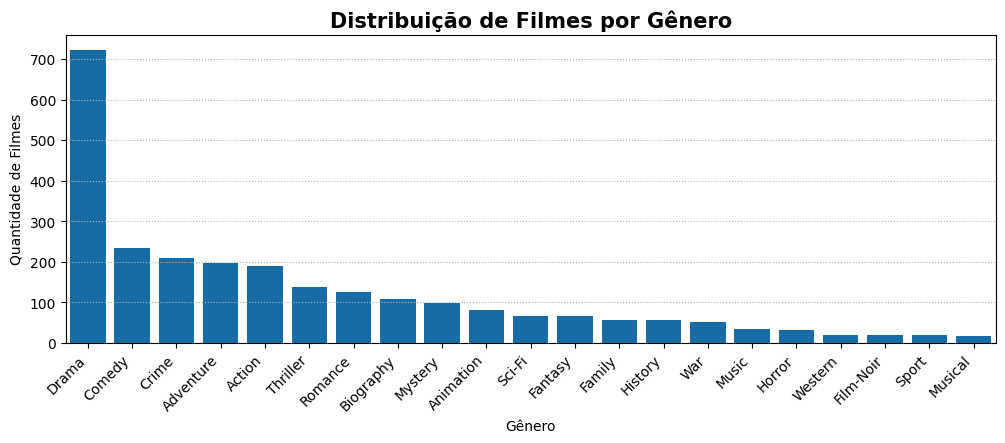

In [27]:
ordem_genero= df_exploded['Genre'].value_counts()

plt.figure(figsize=(12, 4))
sns.barplot(x=ordem_genero.index, y=ordem_genero.values, color=blue)
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Filmes')
plt.title(f'Distribuição de Filmes por Gênero',weight= 'bold', size=15)
plt.grid(axis='y', linestyle= ':')
plt.xticks(rotation=45, ha='right')
plt.show()

O gráfico mostra uma maior concentração de filmes de Drama, consequentemente, demonstrando um maior interesse do público em filmes com esse gênero.

In [28]:
def graficos_genero(df, coluna, dic=dic_grafico, y_limits=None):
    plt.figure(figsize=(12, 4))
    sns.barplot(x='Genre', y=coluna, data=df, color=blue)
    plt.title(f'Gênero vs. {dic[coluna]}', weight= 'bold', size=15)
    plt.xlabel('Gênero')
    plt.ylabel(dic[coluna])
    plt.xticks(rotation=45, ha='right')
    if y_limits:
        plt.ylim(y_limits)
    plt.grid( axis='y', linestyle= ':')
    plt.show()

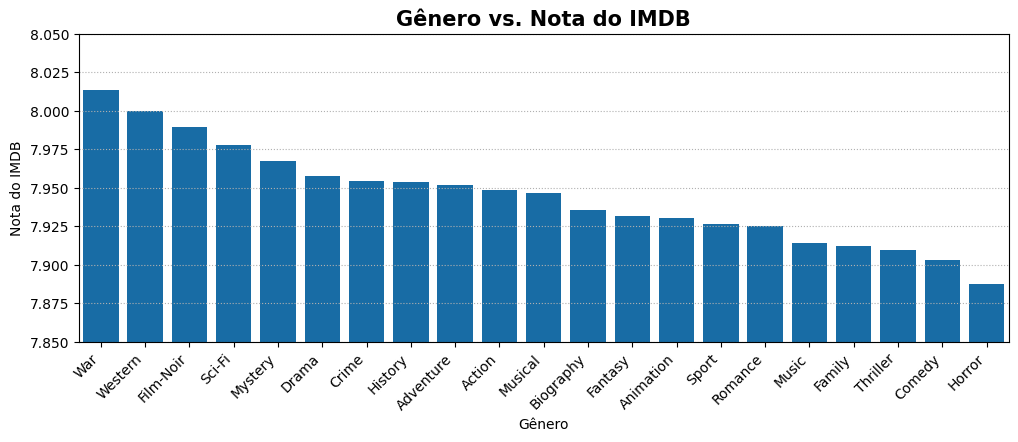

In [29]:
genero_imdb= df_exploded.groupby('Genre')['IMDB_Rating'].mean().reset_index()
genero_imdb_ordem = genero_imdb.sort_values(by='IMDB_Rating', ascending=False)
graficos_genero(genero_imdb_ordem, 'IMDB_Rating', y_limits= [7.85, 8.05])

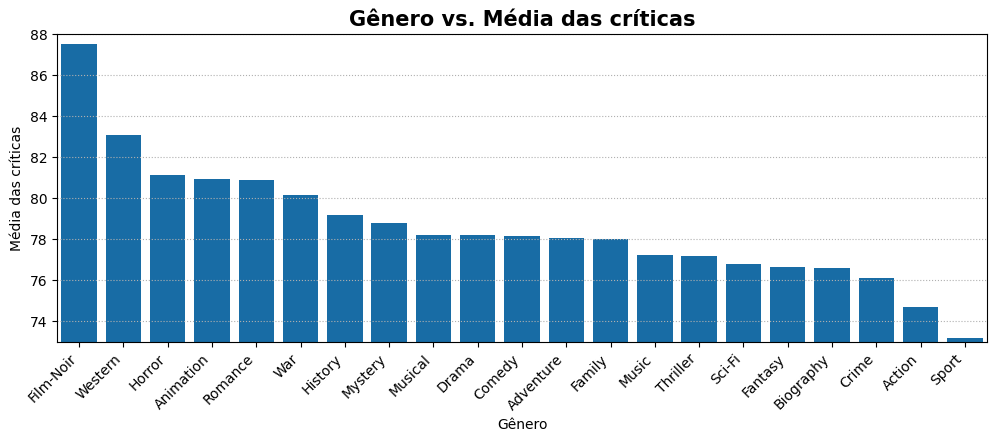

In [30]:
genero_meta_score= df_exploded.groupby('Genre')['Meta_score'].mean().reset_index()
genero_meta_score_ordem = genero_meta_score.sort_values(by='Meta_score', ascending=False)
graficos_genero(genero_meta_score_ordem, 'Meta_score', y_limits=[73, 88])

Ao analisar a média da crítica e a nota do IMDB podemos observar que não mantém o mesmo padrão de avaliação, sendo que o filme de maior média das cíticas é o film-noir, possivelmente pelo mistério envolto do enredo. Já pela nota do IMDB os filmes de guerra tem maior destaque, demonstrando uma maior interesse por filmes de representam histórica, sua mensagem e impacto social que podem estar representados no filme.Outro insight que podemos tirar é que apesar dos filmes de aventura serem os mais presentes no dataframe não são os que possuem melhor avaliação. 

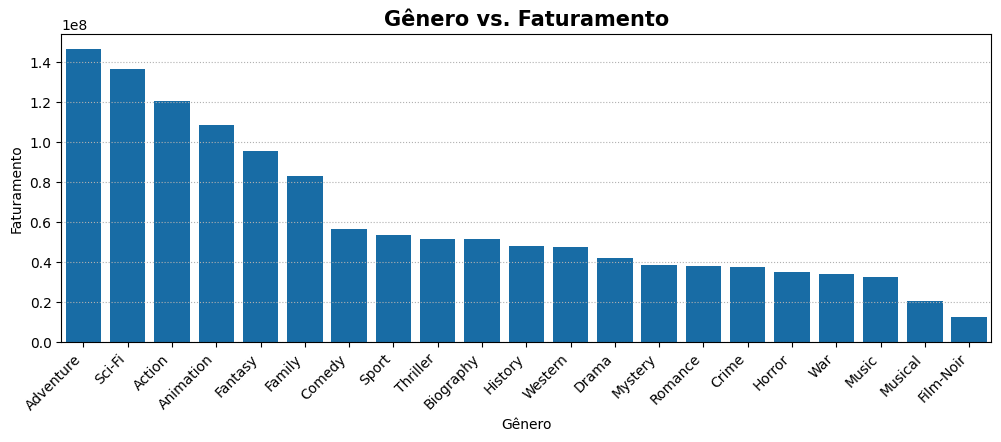

In [31]:
genero_gross = df_exploded.groupby('Genre')['Gross'].mean().reset_index()
genero_gross_ordem= genero_gross.sort_values(by="Gross", ascending=False)
graficos_genero(genero_gross_ordem, 'Gross')

Demonstra que os filmes de aventuras são os que tem um maior faturamento. Também representa os filmes de maiores franquias e bilheterias como no caso de Star Wars e Vingadores. 

##### 3.1.5. Análises Diretores

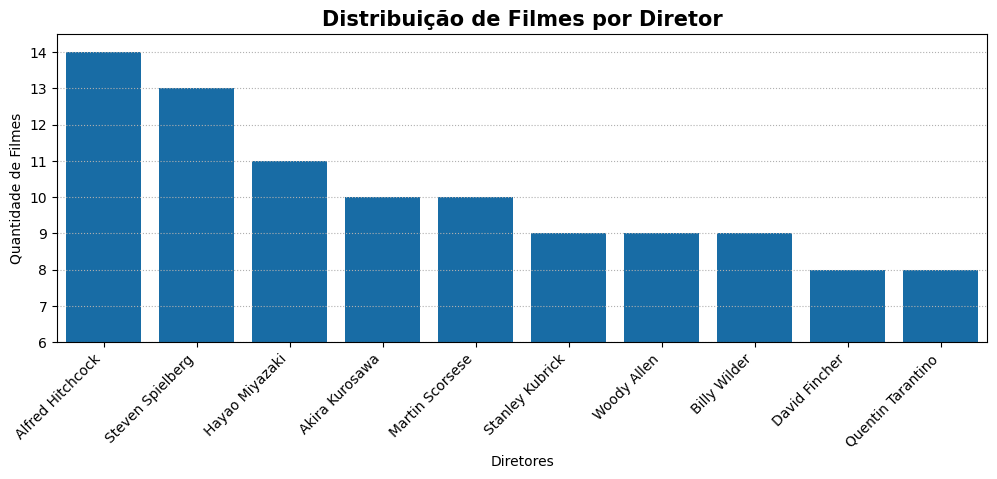

In [32]:
filme_director= df['Director'].value_counts().sort_values(ascending=False).nlargest(10)

plt.figure(figsize=(12, 4))
sns.barplot(x=filme_director.index, y=filme_director.values, color=blue)
plt.xlabel('Diretores')
plt.ylabel('Quantidade de Filmes')
plt.title(f'Distribuição de Filmes por Diretor',weight= 'bold', size=15)
plt.grid(axis='y', linestyle= ':')
plt.xticks(rotation=45, ha='right')
plt.ylim(6, 14.5)
plt.show()

No dataframe os diretores com maior quantidade de filme é Alfred Hitcock, conhecido como Mestre do Suspense que é um diretor que dirigiu 53 longas metragens ao longo de sua carreira, entretanto não é um dos que tem maior faturamento, possivelmente por ter filmes mais antigos em seu portfólio. Já Steven Spielberg é o segundo que tem maior quantidades de filmes e também o que obteve o maior faturamento dentro dos dados de análise.

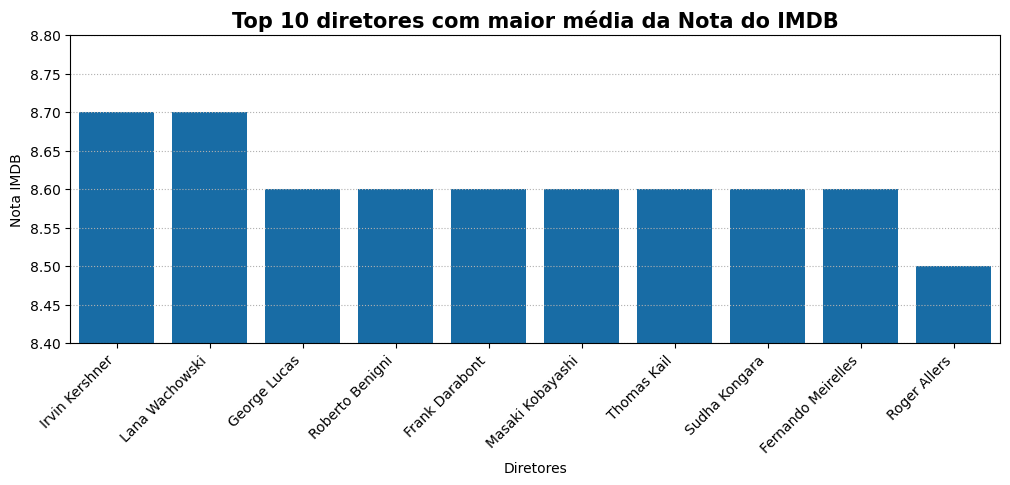

In [33]:
top_directors_imdb = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).nlargest(10).reset_index()
plt.figure(figsize=(12, 4))

sns.barplot(x='Director', y='IMDB_Rating', data=top_directors_imdb, color=blue)

plt.xlabel('Diretores')
plt.ylabel('Nota IMDB')
plt.title('Top 10 diretores com maior média da Nota do IMDB', weight= 'bold', size=15)
plt.xticks(rotation=45, ha='right')
plt.ylim(8.4,  8.8)
plt.grid(axis='y', linestyle= ':')
plt.show()

In [34]:
df[df['Director']=='Irvin Kershner']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
15,Star Wars: Episode V - The Empire Strikes Back,1980,UA,124,"[Action, Adventure, Fantasy]",8.7,After the Rebels are brutally overpowered by t...,82.0,Irvin Kershner,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,1159315,290475067.0


Apesar do gráfico mostrar a diferença das notas dos diretores, não é um gráfico muito representativo pois todos os 10 diretores só possuem 1 filme dentro do dataframe. Para melhor representação seria interessante inserir mais filmes dos mesmos diretores. O que se deve destaque é que a franquia Star Wars é bem presente no Dataframe e com ótimos valores de notas e faturamento. Nesse caso, dois diretores da franquia estão em destaque, o Irvin Kershner e George Lucas. Outro ponto é que dentre os 10 diretores com melhores notas esta um diretor brasileiro, Fernando Meirelles, com o filme Cidade de Deus. 

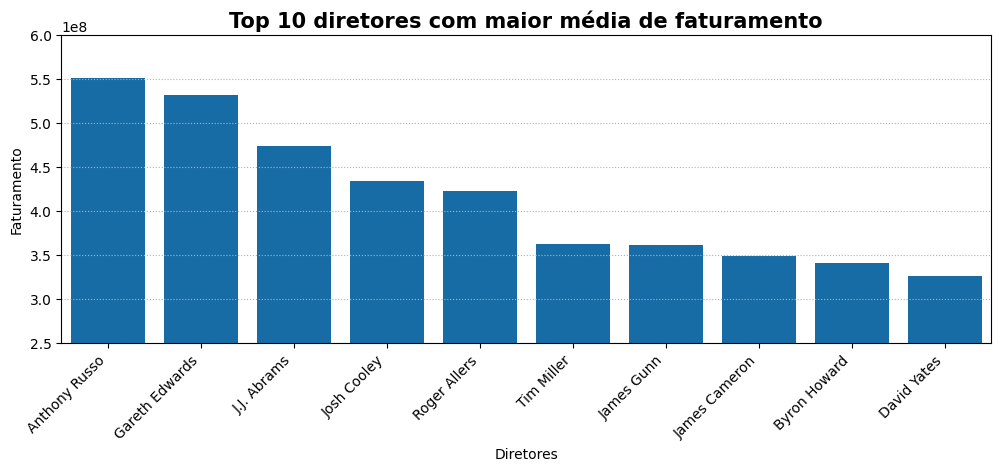

In [35]:
top_directors = df.groupby('Director')['Gross'].mean().sort_values(ascending=False).nlargest(10).reset_index()
plt.figure(figsize=(12, 4))

sns.barplot(x='Director', y='Gross', data=top_directors, color=blue)

plt.xlabel('Diretores')
plt.ylabel('Faturamento')
plt.title('Top 10 diretores com maior média de faturamento', weight= 'bold', size=15)
plt.xticks(rotation=45, ha='right')
plt.ylim(2.5e8,  6e8)
plt.grid(axis='y', linestyle= ':')
plt.show()

No gráfico é possível observar que os diretores com maior média de faturamento não são necessariamente o que mais tem filmes ou melhor nota. São diretores que tem em seu portfólio filmes com alta bilheteria, como no caso Gareth Edwards que possui apenas o filme Rogue One, no dataframe, que é uma filme de grande faturamento.

In [36]:
df[df['Director']=='Gareth Edwards']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
581,Rogue One,2016,UA,133,"[Action, Adventure, Sci-Fi]",7.8,The daughter of an Imperial scientist joins th...,65.0,Gareth Edwards,Felicity Jones,Diego Luna,Alan Tudyk,Donnie Yen,556608,532177324.0


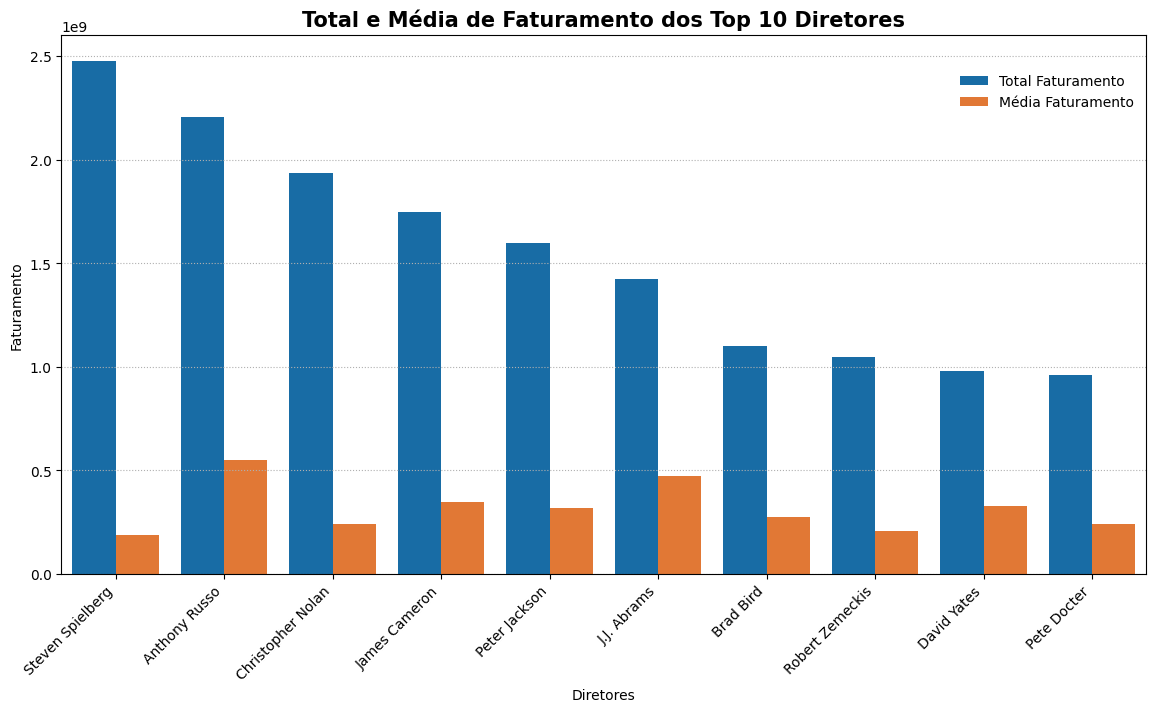

In [37]:
# Calcular o total e a média de faturamento por diretor
total_gross = df.groupby('Director')['Gross'].sum().reset_index()
media_gross = df.groupby('Director')['Gross'].mean().reset_index()

# Renomear colunas para facilitar a junção
total_gross.columns = ['Director', 'Total Faturamento']
media_gross.columns = ['Director', 'Média Faturamento']

# Combinar os DataFrames
combined_gross = pd.merge(total_gross, media_gross, on='Director')

# Selecionar os top 10 diretores por faturamento total
top_directors = combined_gross.sort_values(by='Total Faturamento', ascending=False).head(10)

# Derreter os dados para facilitar a plotagem com seaborn
melted_gross = top_directors.melt(id_vars='Director', value_vars=['Total Faturamento', 'Média Faturamento'],
                                   var_name='Type', value_name='Gross')

colors = {'Total Faturamento': blue, 'Média Faturamento': orange}
# Plotar o gráfico de barras agrupadas
plt.figure(figsize=(14, 7))
sns.barplot(x='Director', y='Gross', hue='Type', data=melted_gross, palette=colors)
plt.xlabel('Diretores')
plt.ylabel('Faturamento')
plt.title('Total e Média de Faturamento dos Top 10 Diretores', weight='bold', size=15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle=':')
plt.legend(bbox_to_anchor=(1.0, 0.95),frameon=False)
plt.show()

Agora ao comparar o faturamento total e a média de faturamento, observamos uma grande diferença e também a presença outros diretores, como no caso de Steven Spielberg que tem em seu portfólio filmes como Tubarão, Indiana Jones, E.T e Jurassik Park, filmes com grande bilheteria.

##### 3.1.3. Análises Certificado

In [38]:
df.Certificate.unique()

array(['A', 'UA', 'U', 'PG-13', 'R', 'PG', 'G', 'Passed', 'TV-14', '16',
       'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'], dtype=object)

**Significado de cada certificação**

- A: Somente para adultos (18 anos ou mais).
- UA: Universal Adult. Adequado para crianças acima de 12 anos. Crianças menores de 12 anos devem assistir acompanhado dos pais.
- U: Universal. Adequado para todos.
- PG-13: Parents Strongly Cautioned. Alguns materiais podem ser inapropriados para crianças menores de 13 anos.
- R: Restricted. Menores de 17 anos exigem a presença de um pai ou guardião adulto.
- PG: Parental Guidance Suggested. Alguns materiais podem não ser apropriados para crianças.
- G: General Audiences. Filme apropriado para todas as idades.
- Passed: Indicava que um filme foi aprovado pelo Código de Produção antes de 1968.
- TV-14: Pais advertidos fortemente. Não recomendado para crianças menores de 14 anos.
- 16: Adequado apenas para pessoas com 16 anos ou mais.
- TV-MA: Público adulto. Inadequado para menores de 17 anos.
- Unrated: Filme que não foi enviado ao sistema de classificação ou não recebeu uma classificação específica.
- GP: General Public. Usado brevemente após 1968, substituído por PG em 1970.
- Approved: Indicava que um filme foi aprovado pelo Código de Produção de Hollywood antes de 1968.
- TV-PG: Parental Guidance Suggested. Algum conteúdo pode não ser apropriado para crianças.
- U/A: Universal Adult. Adequado para crianças acima de 12 anos. Crianças menores de 12 anos devem assistir acompanhado dos pais.







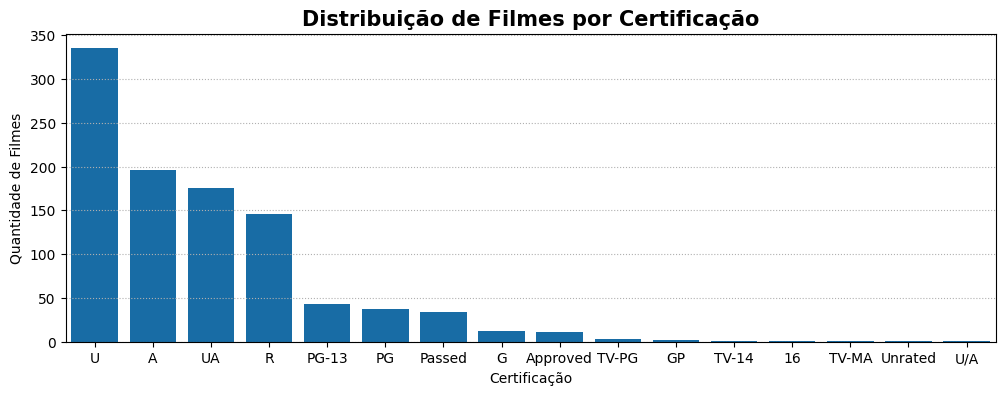

In [39]:
filme_certificate= df['Certificate'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 4))
sns.barplot(x=filme_certificate.index, y=filme_certificate.values, color=blue)
plt.xlabel('Certificação')
plt.ylabel('Quantidade de Filmes')
plt.title(f'Distribuição de Filmes por Certificação',weight= 'bold', size=15)
plt.grid(axis='y', linestyle= ':')
plt.show()

A maioria dos filmes listados estão classificados com certificação U(Universal) que é adequada para todos os públicos. 

In [40]:
def grafico_certificacao(df, coluna, dic=dic_grafico, y_limits=None):
    plt.figure(figsize=(12, 4))
    sns.barplot(x='Certificate', y=coluna, data=df, color=blue)
    plt.xlabel('Certificação')
    plt.ylabel(dic[coluna])
    plt.title(f'{dic[coluna]} de acordo com a Certificação', weight= 'bold', size=15)
    if y_limits:
        plt.ylim(y_limits)
    plt.grid(axis='y', linestyle= ':')
    plt.show()

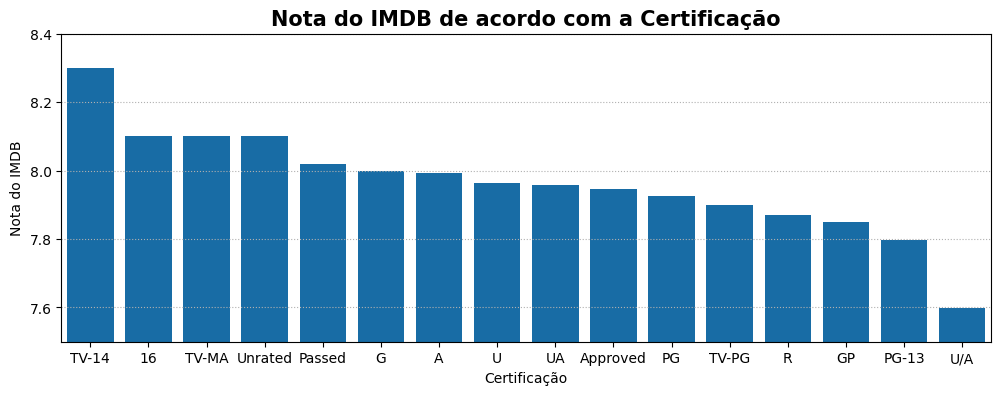

In [41]:
certificate_imdb = df.groupby('Certificate')['IMDB_Rating'].mean().sort_values(ascending=False).reset_index()
grafico_certificacao(certificate_imdb, 'IMDB_Rating', y_limits=[7.5, 8.4])


In [42]:
df[df['Certificate']== 'Unrated']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
239,Dil Chahta Hai,2001,Unrated,183,"[Comedy, Drama, Romance]",8.1,Three inseparable childhood friends are just o...,79.0,Farhan Akhtar,Aamir Khan,Saif Ali Khan,Akshaye Khanna,Preity Zinta,66803,300000.0


No gráfico os três primeiros com maiores notas não são muito representativos, pois apresentam a média de apenas 1 filme. Se levarmos em consideração certificações com maiores quantidades de filmes podemos perceber que os com maior público, classificação Geral(G) são os que possuem maior nota do IMDB.

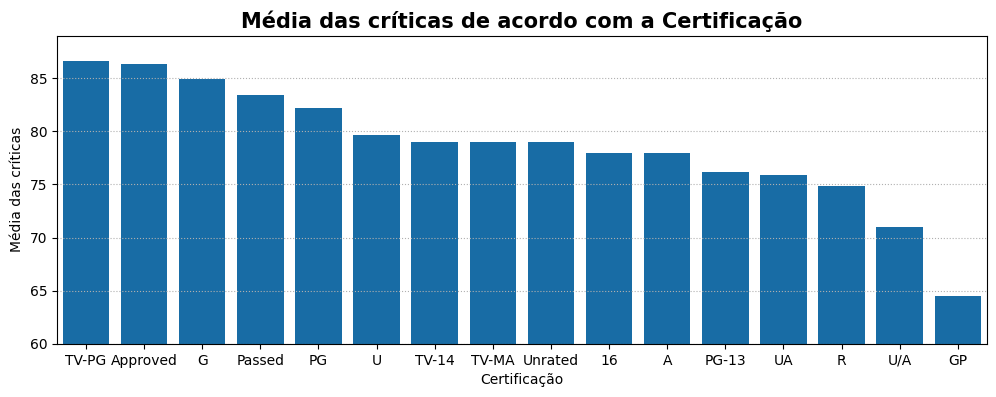

In [43]:
certificate_meta_score = df.groupby('Certificate')['Meta_score'].mean().sort_values(ascending=False).reset_index()
grafico_certificacao(certificate_meta_score, 'Meta_score', y_limits=[60,89])

A mesma tendência pode ser observada na média das críticas. Os filmes que tem maior público, os seja, tem a classificação liberada, possuem uma maior média da nota.

##### 3.1.3. Análises do Faturamento

In [44]:
def grafico_faturamento (df, colunas, dic=dic_grafico, alvo='Gross'):
    for coluna in colunas:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[coluna], y=alvo, data=df, color=blue)
        plt.title(f'{dic[coluna]} vs. {dic[alvo]}', weight= 'bold', size=15)
        plt.xlabel(dic[coluna])
        
        plt.ylabel(dic[alvo])
        plt.show()

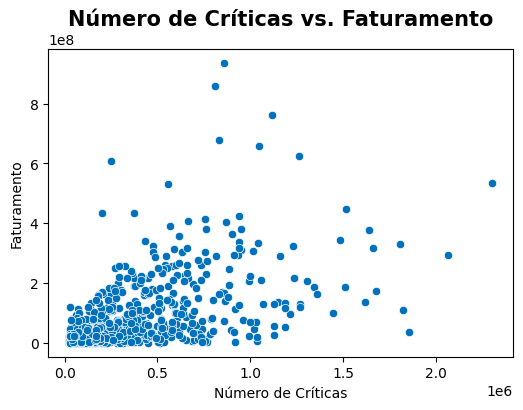

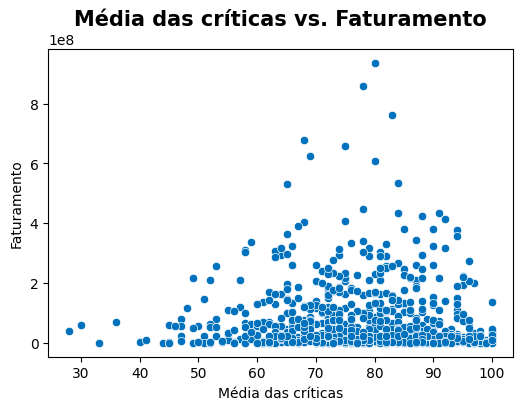

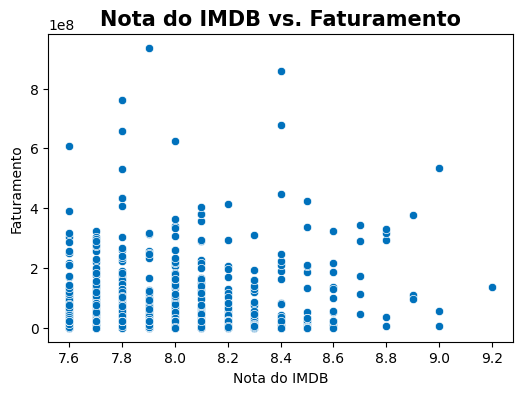

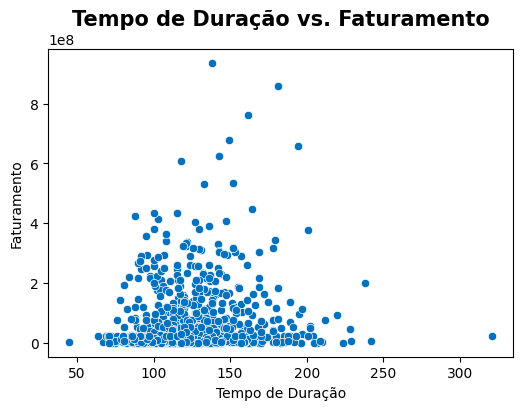

In [45]:
colunas_grafico_faturamento = ['No_of_Votes', 'Meta_score', 'IMDB_Rating', 'Runtime']
grafico_faturamento(df, colunas_grafico_faturamento)

Observamos a mesma tendência de variação das distribuição dos dados que observamos anteriormente. No gráfico de dispersão pode-se observar:

- Uma maior concentração dos número de críticas entre 0-2le8 de faturamento, pois é uma região que apresenta a maior quantidade dos filmes. E que a maior parte dos números de críticas estão entre 0-5le6.

- Comparando a média de score e o imdb, podemos perceber uma maior concentração de notas do IMDB na região de 80 para cima e mais com faturamentos mais baixos. Já para média de score os valores são mais distribuidos e tem uma concentração entre maior na região de 8 até 7.7.

- Por fim, o tempo de duranção dos filmes também estão mais concentrados e não apresentam uma tendência de quanto maior ou menor o tempo de duração maior o faturamento.

##### 3.2. Qual filme você recomendaria para uma pessoa que você não conhece?


Para escolher os filmes que eu recomendaria primeiramente realizei um filtro considerando todos os filmes que estão acima do 3 quartil(75%). Esses valores são representados por valores de IMDB acima ou igual de 8.1, meta score acima ou igual a 85 e no_of_votes acima ou igual a 373000. Além disso, também foi considerado o Genero e o ano de lançamento.  

In [46]:
# filmes com alta avaliação de IMDb rating, meta score e grande número de votos
melhores_filmes = df[(df['IMDB_Rating'] >= 8.1) & 
                (df['Meta_score'] >= 85) & 
                (df['No_of_Votes'] >= 373000)]
filmes_recomendados = melhores_filmes.sort_values(by=['IMDB_Rating', 'Meta_score', 'No_of_Votes'],
                                                   ascending=[False, False, False])
filmes_recomendados[['Series_Title', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Released_Year', 'Genre']].head(6)

,Series_Title,IMDB_Rating,Meta_score,No_of_Votes,Released_Year,Genre
0,The Godfather,9.2,100.0,1620367,1972,"[Crime, Drama]"
3,12 Angry Men,9.0,96.0,689845,1957,"[Crime, Drama]"
2,The Godfather: Part II,9.0,90.0,1129952,1974,"[Crime, Drama]"
5,Pulp Fiction,8.9,94.0,1826188,1994,"[Crime, Drama]"
4,The Lord of the Rings: The Return of the King,8.9,94.0,1642758,2003,"[Action, Adventure, Drama]"
6,Schindler's List,8.9,94.0,1213505,1993,"[Biography, Drama, History]"


Eu recomendaria qualquer um desses filmes para uma pessoa que não conheceria. Entretanto, deixei algumas informações adicionais caso a pessoa demonstrasse alguma preferência. Por exemplo, caso a pessoa prefira um filme mais novo ou de ação eu recomendaria 'The Lord of the Rings: The Return of the King'.  

##### 3.3. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 


Como demonstrado no mapa de correlação o valor de No_of_Votes tem forte correlação com o faturamento. Isso significa que quanto maior a quantidade de público que votou no filme maior a quantidade de pessoas que assistiu, pagou para ver o filme.

Outro fator que demonstra alta expectativa de faturamento é o diretor do filme. Observamos nos gráficos anteriores que filmes dirigidos pos Antonhy Russo, por exemplo, tem maior média de faturamento.

Além dos dados observados graficamente também foi observado uma tendência em filmes da franquia Star Wars. Esses filmes, estão relacionados com alto faturamento e boas notas.

##### 3.4. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?



In [47]:
#Padronizar a coluna overview
df['Overview']= df['Overview'].str.lower()
#Retirar símbolos de pontuação da coluna text
df['Overview'] = df['Overview'].str.replace('[^\w\s]','')

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\adrie\AppData\Local\Temp\ipykernel_13100\2893873451.py:4: SyntaxWarning: invalid escape sequence '\w'
  df['Overview'] = df['Overview'].str.replace('[^\w\s]','')


In [48]:
df.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"[Crime, Drama]",9.2,an organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152,"[Action, Crime, Drama]",9.0,when the menace known as the joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,A,202,"[Crime, Drama]",9.0,the early life and career of vito corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0


Removendo stopwords. são palavras consideradas de pouco valor para a análise semântica, pois aparecem com alta frequência e geralmente não carregam um significado significativo por si mesmas

In [49]:
nltk.download('stopwords')
stop = set(stopwords.words("english"))

def preprocessamento_texto(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adrie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
df['Overview']= df.Overview.map(preprocessamento_texto)

Separando os 5 gêneros mais presentes no dataframe.

In [51]:
top_5_genero =ordem_genero.head(5).index.tolist()
top_5_genero

['Drama', 'Comedy', 'Crime', 'Adventure', 'Action']

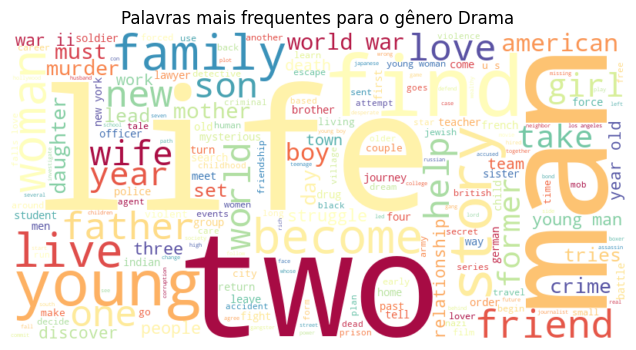

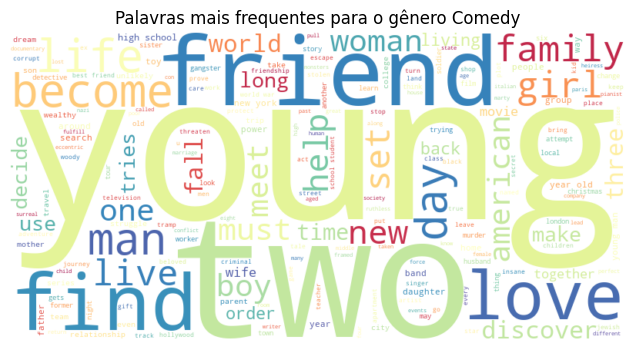

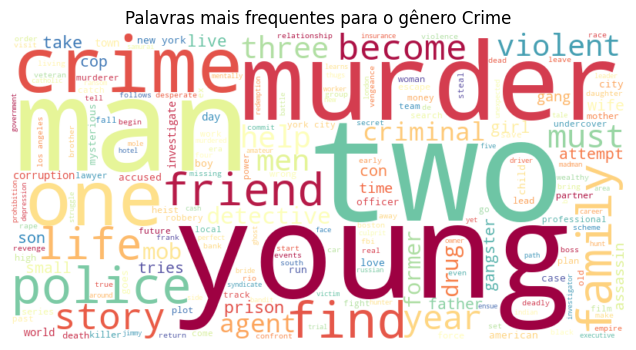

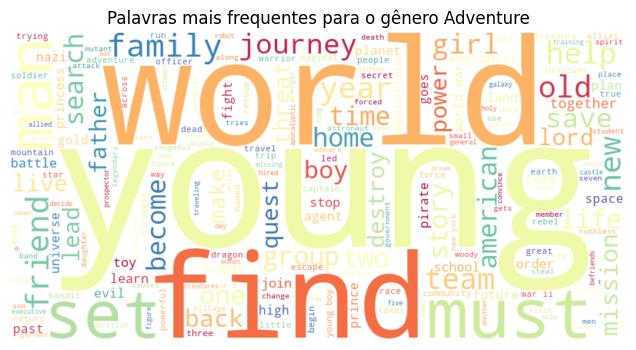

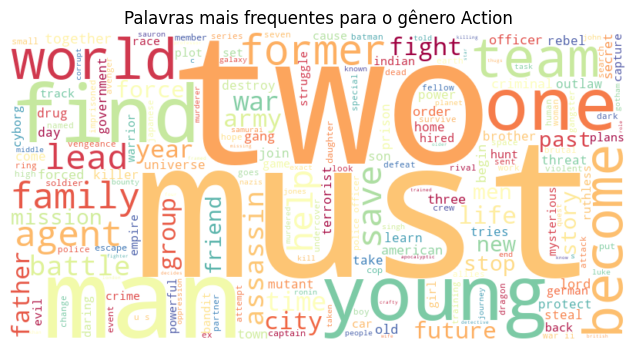

In [52]:
for genero in top_5_genero:
    overviews_filtrados = ' '.join(df[df['Genre'].apply(lambda x: genero in x)]['Overview'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Spectral').generate(overviews_filtrados)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud,  interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Palavras mais frequentes para o gênero {genero}')
    plt.show()

Através da nuvem de palavras conseguimos visualizar as palavras que estão presentes nos gêneros de filmes selecionados. Entretanto não é possível identificar o contexto do filme apenas por essas palavras. Para uma análise mais detalhada seria necessário aplicar outro tipo de tratamento, como um ML ou um Processamento de Linguagem Natural.

## 4. Modelo

### 4.1. Explique como você faria a previsão da nota do imdb a partir dos dados. 

**Quais variáveis e/ou suas transformações você utilizou e por quê?**

As variáveis utilizadas foram Released_Year, Certificate,Runtime, Genre, IMDB_Rating, Meta_score, Director, No_of_Votes e Gross. 

Com as análises exploratórias observamos que todas as variáveis númericas tem correlação com o IMDB_Rating em especial o No_of_Votes que tem uma correlação de 60%. As colunas 'Genre', 'Certificate' e 'Director' também apresentaram influência no valor de IMDB_Rating.

Os tratamentos das colunas numericas foi realizada durante a análise exploatória. E para as colunas atributos 'Genre', 'Certificate' e 'Director', foi aplicada uma transformação para torná-los atributos categóricos. Essa técnica converte os dados categóricos textuais em variáveis numéricas, facilitando seu uso em diferentes modelos de machine learning. 

**Qual tipo de problema estamos resolvendo (regressão, classificação)?**

Como estamos tentando prever o valor de IMDB_Rating que é um valor contínuo(Nota do IMDB) o tipo de problema que será resovido é de regressão.


**Qual medida de performance do modelo foi escolhida e por quê?**

Para a previsão do IMDB_Rating utilizou-se mais de um ML. OS modelos escolhidos para teste foram: Regressão Linear, Random Forest XGBoost. A utilização de vários modelos teve como objetivo detectar qual apresenta melhor performance para os dados utilizados e qual tem uma melhor precisão.

A métricas escolhida para avaliar o desempenho foi o Erro Quadrático Médio (MSE). O MSE é amplamente utilizado em diferentes áreas, desde problemas econômicos até aprendizado de máquina, facilitando comparações entre diferentes modelos e abordagens. E também representa uma média dos quadrados dos erros entre as previsões do modelo e os valores reais, o que proporciona uma interpretação intuitiva do desempenho do modelo: quanto menor o MSE, melhor o ajuste do modelo aos dados.

**Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**

O modelo escolhido foi o XGBoost, pois apresentou um menor valor de MSE, significando que sua predição apresenta um menor erro quando comparado com os outros modelos escolhidos.

**Prós**
- Pode aprender relacionamentos não lineares complexos;
- Tem bom desempenho e tem regularização integrada o que evita o overfitting.

**Contras**
- Tem muitos hiperparâmetros que podem ser ajustados e afetam seu desempenho;
- Não funciona muito bem para dados esparsos e não estruturados.

Referência : (https://medium.com/wake-write-win/gps-vs-linear-regression-vs-xgboost-886fac83d5a3)

In [53]:
df_ml = df_exploded.copy()

In [54]:
#Excuir coluna não reevantes
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2540 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   2540 non-null   object 
 1   Released_Year  2540 non-null   int32  
 2   Certificate    2540 non-null   object 
 3   Runtime        2540 non-null   int32  
 4   Genre          2540 non-null   object 
 5   IMDB_Rating    2540 non-null   float64
 6   Overview       2540 non-null   object 
 7   Meta_score     2540 non-null   float64
 8   Director       2540 non-null   object 
 9   Star1          2540 non-null   object 
 10  Star2          2540 non-null   object 
 11  Star3          2540 non-null   object 
 12  Star4          2540 non-null   object 
 13  No_of_Votes    2540 non-null   int64  
 14  Gross          2540 non-null   float64
dtypes: float64(3), int32(2), int64(1), object(9)
memory usage: 297.7+ KB


In [55]:
df_ml.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
0,The Godfather,1972,A,175,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0


In [56]:
# Excluindo colunas que não serão utilizados nas predições
df_ml=df_ml.drop(columns=['Series_Title', 'Overview', 'Star1', 'Star2', 'Star3', 'Star4'])

In [57]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2540 entries, 0 to 998
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  2540 non-null   int32  
 1   Certificate    2540 non-null   object 
 2   Runtime        2540 non-null   int32  
 3   Genre          2540 non-null   object 
 4   IMDB_Rating    2540 non-null   float64
 5   Meta_score     2540 non-null   float64
 6   Director       2540 non-null   object 
 7   No_of_Votes    2540 non-null   int64  
 8   Gross          2540 non-null   float64
dtypes: float64(3), int32(2), int64(1), object(3)
memory usage: 178.6+ KB


In [58]:
# Codificação das colunas categoricas usando o labelencoder
label_encoder = LabelEncoder()

df_ml['Certificate'] = label_encoder.fit_transform(df_ml['Certificate']) + 1
certificate_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_) + 1))

df_ml['Genre'] = label_encoder.fit_transform(df_ml['Genre']) + 1
genre_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_) + 1))

df_ml['Director'] = label_encoder.fit_transform(df_ml['Director']) + 1
director_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_) + 1))

df_ml.head()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,1972,2,175,6,9.2,100.0,138,1620367,134966411.0
0,1972,2,175,7,9.2,100.0,138,1620367,134966411.0
1,2008,15,152,1,9.0,84.0,84,2303232,534858444.0
1,2008,15,152,6,9.0,84.0,84,2303232,534858444.0
1,2008,15,152,7,9.0,84.0,84,2303232,534858444.0


In [59]:
print("Mapeamento para 'Certificate':")
print(certificate_mapping)

print("\nMapeamento para 'Genre':")
print(genre_mapping)

print("\nMapeamento para 'Director':")
print(director_mapping)

Mapeamento para 'Certificate':
{'16': 1, 'A': 2, 'Approved': 3, 'G': 4, 'GP': 5, 'PG': 6, 'PG-13': 7, 'Passed': 8, 'R': 9, 'TV-14': 10, 'TV-MA': 11, 'TV-PG': 12, 'U': 13, 'U/A': 14, 'UA': 15, 'Unrated': 16}

Mapeamento para 'Genre':
{'Action': 1, 'Adventure': 2, 'Animation': 3, 'Biography': 4, 'Comedy': 5, 'Crime': 6, 'Drama': 7, 'Family': 8, 'Fantasy': 9, 'Film-Noir': 10, 'History': 11, 'Horror': 12, 'Music': 13, 'Musical': 14, 'Mystery': 15, 'Romance': 16, 'Sci-Fi': 17, 'Sport': 18, 'Thriller': 19, 'War': 20, 'Western': 21}

Mapeamento para 'Director':
{'Aamir Khan': 1, 'Aaron Sorkin': 2, 'Abdellatif Kechiche': 3, 'Abhishek Chaubey': 4, 'Abhishek Kapoor': 5, 'Adam Elliot': 6, 'Adam McKay': 7, 'Aditya Chopra': 8, 'Aditya Dhar': 9, 'Akira Kurosawa': 10, 'Alain Resnais': 11, 'Alan J. Pakula': 12, 'Alan Parker': 13, 'Alejandro Amenábar': 14, 'Alejandro G. Iñárritu': 15, 'Alejandro Jodorowsky': 16, 'Alex Garland': 17, 'Alex Proyas': 18, 'Alexander Mackendrick': 19, 'Alexander Payne': 20, 

##### Dividindo os dados para teste e treino

In [60]:
X = df_ml.drop('IMDB_Rating', axis=1)

#coluna target
y = df_ml['IMDB_Rating']

#tamanhos para testes
test_sizes = [0.2, 0.3]

### Regresão Linear

In [61]:
def train_test_regression(X, y, test_size=0.2, random_state=7):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    return mse, r2, mape

In [62]:
print('Regressão Linear')
print()
for test_size in test_sizes:
    mse, r2, mape = train_test_regression(X, y, test_size=test_size)
    print(f'Test Size: {test_size}')
    print('MAPE (Mean Absolute Percentage Error):', mape)
    print('MSE (Mean Squared Error):', mse)
    print('R2:', r2)
    print('---------------------------------------------------------------')

Regressão Linear

Test Size: 0.2
MAPE (Mean Absolute Percentage Error): 2.100964213213062
MSE (Mean Squared Error): 0.04274806873933134
R2: 0.45179009247302593
---------------------------------------------------------------
Test Size: 0.3
MAPE (Mean Absolute Percentage Error): 2.094126088886034
MSE (Mean Squared Error): 0.04109548842344644
R2: 0.4601137614588281
---------------------------------------------------------------


### Random Forrest

In [63]:
def train_test_random_forest(X, y, test_size=0.3, random_state=7, n_estimators=100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model = RandomForestRegressor(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    return mse, r2, mape

In [64]:
print('Random Forest')
print()
for test_size in test_sizes:
    mse, r2, mape = train_test_random_forest(X, y, test_size=test_size)
    print(f'Test Size: {test_size}')
    print('MAPE (Mean Absolute Percentage Error):', mape)
    print('MSE (Mean Squared Error):', mse)
    print('R2:', r2)
    print('---------------------------------------------------------------')

Random Forest

Test Size: 0.2
MAPE (Mean Absolute Percentage Error): 0.7030517278541379
MSE (Mean Squared Error): 0.007685899606299313
R2: 0.9014344639023602
---------------------------------------------------------------
Test Size: 0.3
MAPE (Mean Absolute Percentage Error): 0.8457065403199616
MSE (Mean Squared Error): 0.010239429133858374
R2: 0.8654809300980666
---------------------------------------------------------------


### XGBoost

In [65]:
def train_test_xgboost(X, y, test_size=0.3, random_state=7, n_estimators=100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model =XGBRegressor(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    return mse, r2, mape

In [66]:
print('XGBoost')
print()
for test_size in test_sizes:
    mse, r2, mape = train_test_xgboost(X, y, test_size=test_size)
    print(f'Test Size: {test_size}')
    print('MAPE (Mean Absolute Percentage Error):', mape)
    print('MSE (Mean Squared Error):', mse)
    print('R2:', r2)
    print('---------------------------------------------------------------')

XGBoost

Test Size: 0.2
MAPE (Mean Absolute Percentage Error): 0.5259420768785541
MSE (Mean Squared Error): 0.005794588699925053
R2: 0.9256890187317395
---------------------------------------------------------------
Test Size: 0.3
MAPE (Mean Absolute Percentage Error): 0.6071249198492972
MSE (Mean Squared Error): 0.00744535528156128
R2: 0.9021876850289139
---------------------------------------------------------------


Após os testes dos modelos observou-se que o XGBoost obteve menores valores de MSE quando comparado com os outros dois modelos. Sendo assim o XGBoost obteve um melhor desempenho.

## 5. Previsão

In [67]:
previsao = {
 'Series_Title': 'The Shawshank Redemption',
 'Released_Year':1994,
 'Certificate': 'A',
 'Runtime': 142,
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': 28341469
 }

Será necessário a conversão dos valores categoricos para os números correspondentes.

In [68]:
print("Número associado a 'Certificate':", certificate_mapping['A'])
print("Número associado a 'Genre':", genre_mapping['Drama'])
print("Número associado a 'Director':", director_mapping['Frank Darabont'])

Número associado a 'Certificate': 2
Número associado a 'Genre': 7
Número associado a 'Director': 142


Removendo as colunas não utilizadas para previsão e substituição dos valores categoricos para númericos.

In [69]:
amostra = {
 'Released_Year':1994,
 'Certificate': 2,
 'Runtime': 142,
 'Genre': 7,
 'Meta_score': 80.0,
 'Director': 142,
 'No_of_Votes': 2343110,
 'Gross': 28341469
  }

Como o XGBoost teve melhor desempenho ele será reproduzido novamente para ser salvo em formato pkl.

In [70]:
def train_test_xgboost(X, y, test_size=0.2, random_state=7, n_estimators=100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    modelRF = XGBRegressor(n_estimators=n_estimators)

    modelRF.fit(X_train, y_train)

    joblib.dump(modelRF, 'final_model.pkl')

    return modelRF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
model = train_test_xgboost(X_train, y_train)

In [71]:
model = joblib.load('final_model.pkl')
new_df = pd.DataFrame(amostra, index=[0])

predicted_price = model.predict(new_df)

print("Nota do IMDB:", predicted_price)

Nota do IMDB: [8.835635]


A nota do filme 'The Shawshank Redemption' no site do IMDB é de 9.3. Calculando o erro, temos:

https://www.imdb.com/title/tt0111161/

In [72]:
(9.3 - predicted_price)*100/9.3

array([4.993172], dtype=float32)

### Qual tipo de filme deve ser o próximo a ser desenvolvido?

Com base nas análises desenvolvidas ao longo de todo o desafio e visando um alto faturamento proponho o desenvolvimento de um filme de aventura e ação. Além disso, a presentça de um diretor renomado fará diferença para o sucesso do filme. Como estratégia adicional poderia levar em consideração o desenvolvimento de alguma grande franquia de filmes ou até mesmo de livros de grande sucessos que ainda não foram adaptados para o cinema. Outro ponto para o sucesso de um filme é estratégias de marketing envolvidas durante o desenvolvimento e lançamento.